<a href="https://colab.research.google.com/github/Nithin9989/PRODIGY_WD_01/blob/main/sales_fore_casting_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
store_sales = pd.read_csv('/sales_predections.csv')


















In [ ]:
store_sales.head(20)






,date,store,item,sales
0,01-01-2013,1,1,13
1,02-01-2013,1,1,11
2,03-01-2013,1,1,14
3,04-01-2013,1,1,13
4,05-01-2013,1,1,10
5,06-01-2013,1,1,12
6,07-01-2013,1,1,10
7,08-01-2013,1,1,9
8,09-01-2013,1,1,12
9,10-01-2013,1,1,9


In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


cheack for null values in the dataset

dropping store and item colums

In [ ]:
store_sales = store_sales.drop(['store','item'],axis=1)

In [ ]:
store_sales.info()











<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


converting date from object datatype to datetime datatype

In [ ]:
store_sales['date'] = pd.to_datetime(store_sales['date'], format='%d-%m-%Y')

In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


converting date to a month period and then sum the number of items in each month

In [ ]:
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()

convert the resulting date to timestamp datatype

In [ ]:
monthly_sales['data'] = monthly_sales['date'].dt.to_timestamp

In [ ]:
monthly_sales.head(20)

,date,sales,data
0,2013-01,454904,<bound method PandasDelegate._add_delegate_acc...
1,2013-02,459417,<bound method PandasDelegate._add_delegate_acc...
2,2013-03,617382,<bound method PandasDelegate._add_delegate_acc...
3,2013-04,682274,<bound method PandasDelegate._add_delegate_acc...
4,2013-05,763242,<bound method PandasDelegate._add_delegate_acc...
5,2013-06,795597,<bound method PandasDelegate._add_delegate_acc...
6,2013-07,855922,<bound method PandasDelegate._add_delegate_acc...
7,2013-08,766761,<bound method PandasDelegate._add_delegate_acc...
8,2013-09,689907,<bound method PandasDelegate._add_delegate_acc...
9,2013-10,656587,<bound method PandasDelegate._add_delegate_acc...


visualization

# New Section

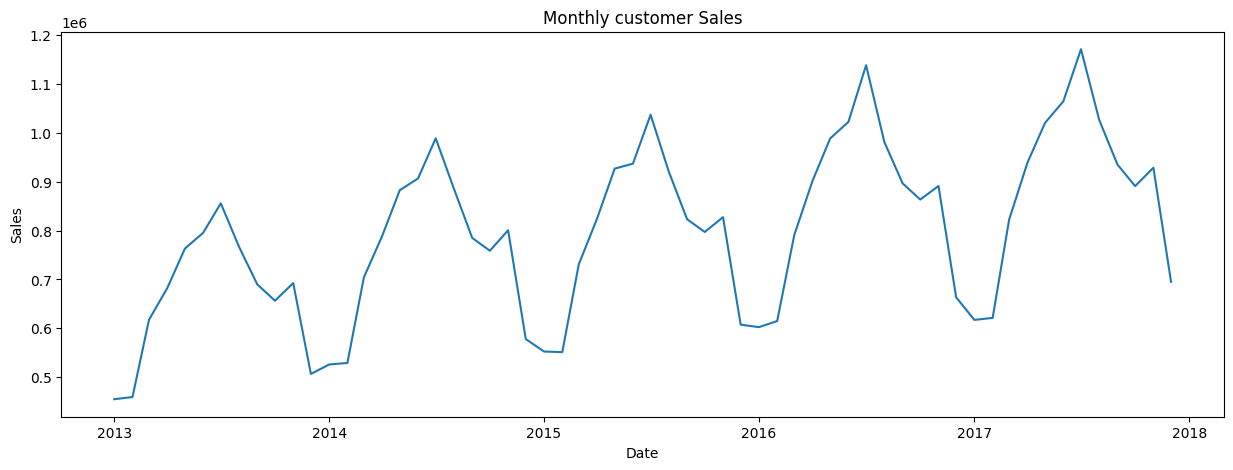

In [ ]:
# Convert 'date' column to Timestamp objects before plotting:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()  # Call the function with ()

from datetime import date
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.title('Monthly customer Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

call the difference on the sales to make the sales data stationary

In [ ]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales.dropna(inplace=True)
monthly_sales.head(20)

,date,sales,data,sales_diff
1,2013-02-01,459417,<bound method PandasDelegate._add_delegate_acc...,4513.0
2,2013-03-01,617382,<bound method PandasDelegate._add_delegate_acc...,157965.0
3,2013-04-01,682274,<bound method PandasDelegate._add_delegate_acc...,64892.0
4,2013-05-01,763242,<bound method PandasDelegate._add_delegate_acc...,80968.0
5,2013-06-01,795597,<bound method PandasDelegate._add_delegate_acc...,32355.0
6,2013-07-01,855922,<bound method PandasDelegate._add_delegate_acc...,60325.0
7,2013-08-01,766761,<bound method PandasDelegate._add_delegate_acc...,-89161.0
8,2013-09-01,689907,<bound method PandasDelegate._add_delegate_acc...,-76854.0
9,2013-10-01,656587,<bound method PandasDelegate._add_delegate_acc...,-33320.0
10,2013-11-01,692643,<bound method PandasDelegate._add_delegate_acc...,36056.0


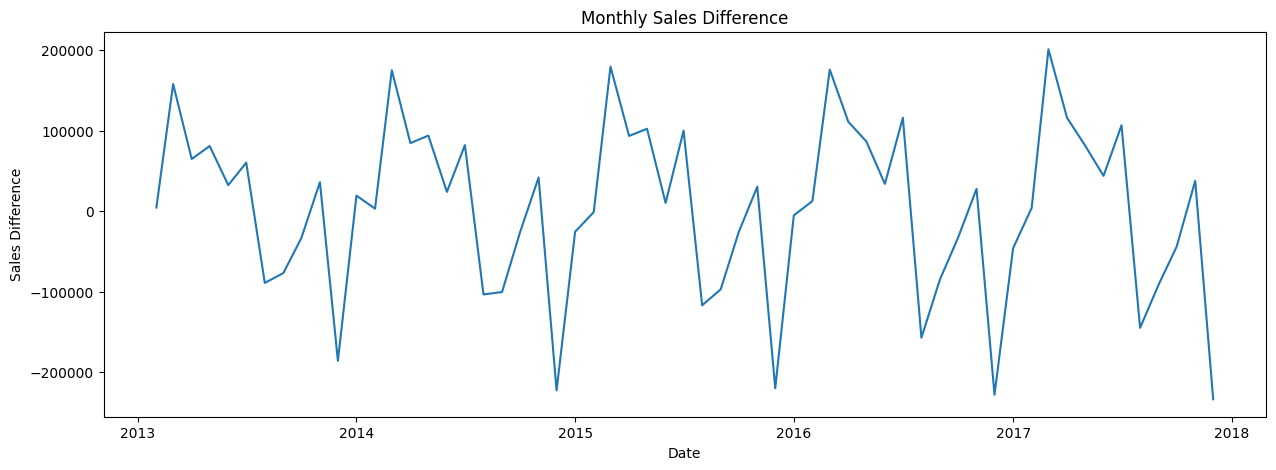

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales_diff'])
plt.title('Monthly Sales Difference')
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.show()

dropping off sales and date

In [ ]:
supervised_data = monthly_sales.drop(['date','sales'], axis=1)

preparing the supervised data

In [ ]:
for i in range(1,13):
      col_name = 'month_' + str(i)
      supervised_data[col_name] = supervised_data['sales_diff'].shift(i) # Removed extra indent here
supervised_data = supervised_data.dropna().reset_index(drop=True) # Removed extra indent here
supervised_data.head(20) # Removed extra indent here

,data,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,<bound method PandasDelegate._add_delegate_acc...,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,<bound method PandasDelegate._add_delegate_acc...,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,<bound method PandasDelegate._add_delegate_acc...,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,<bound method PandasDelegate._add_delegate_acc...,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,<bound method PandasDelegate._add_delegate_acc...,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,<bound method PandasDelegate._add_delegate_acc...,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,<bound method PandasDelegate._add_delegate_acc...,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,<bound method PandasDelegate._add_delegate_acc...,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,<bound method PandasDelegate._add_delegate_acc...,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,<bound method PandasDelegate._add_delegate_acc...,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


split the data into train and test

In [ ]:
train_data = supervised_data.iloc[:-12]
test_data = supervised_data.iloc[-12:]
print("Train Data Shape: ", train_data.shape)
print("Train Data Shape: ", test_data.shape)

Train Data Shape:  (35, 14)
Train Data Shape:  (12, 14)


# New Section

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming supervised_data is your DataFrame
# Convert all columns to numeric, coercing errors to NaN
for col in supervised_data.columns:
  supervised_data[col] = pd.to_numeric(supervised_data[col], errors='coerce')

  # Fill NaN values with 0 (or another appropriate strategy)
  supervised_data = supervised_data.fillna(0)

  # Redo the data splitting and scaling
  train_data = supervised_data.iloc[:-12]
  test_data = supervised_data.iloc[-12:]

  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaler.fit(train_data)
  train_data = scaler.transform(train_data)
  test_data = scaler.transform(test_data)

In [ ]:
X_train, y_train = train_data[:, 1:], train_data[:, 0:1]
X_test, y_test = test_data[:, 1:], test_data[:, 0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape:  ", X_test.shape)
print("y_test shape:  ", y_test.shape)



X_train shape:  (35, 13)
y_train shape:  (35,)
X_test shape:   (12, 13)
y_test shape:   (12,)


make prediction data frame to merge the predicted sales prices of all trained algs

In [ ]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(columns=['date','sales'])



In [ ]:
act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


to create the linerar regression model and liner regression prediction

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [ ]:
lr_pred = lr_pred.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_pred, X_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)
lr_pred = lr_pre_test_set[:,0]
#this is a set matrix - contains the input features of the test data and aslo predicted output

In [ ]:
result_list =[]
for index in range(0,len(lr_pred)):
  result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pred_series = pd.Series(result_list, name='Linear prediction')
predict_df = predict_df.merge(lr_pred_series, left_index = True, right_index = True)


In [ ]:
#lr_mse = np.sqrt(mean_squared_error(y_test, lr_pred))
print(predict_df)


   date  sales       sales  Linear prediction_x  Linear prediction_y  \
0   NaN    NaN   663411.75            663411.75            663411.75   
1   NaN    NaN   617306.75            617306.75            617306.75   
2   NaN    NaN   621369.75            621369.75            621369.75   
3   NaN    NaN   822667.75            822667.75            822667.75   
4   NaN    NaN   938862.75            938862.75            938862.75   
5   NaN    NaN  1020686.75           1020686.75           1020686.75   
6   NaN    NaN  1064624.75           1064624.75           1064624.75   
7   NaN    NaN  1171393.75           1171393.75           1171393.75   
8   NaN    NaN  1026403.75           1026403.75           1026403.75   
9   NaN    NaN   935263.75            935263.75            935263.75   
10  NaN    NaN   891160.75            891160.75            891160.75   
11  NaN    NaN   928837.75            928837.75            928837.75   

    Linear prediction  
0           663411.75  
1           617

In [ ]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear prediction'], monthly_sales['sales'] [-12:]))
lr_mae = mean_absolute_error(predict_df['Linear prediction'], monthly_sales['sales'] [-12:])
lr_r2 = r2_score(predict_df['Linear prediction'], monthly_sales['sales'] [-12:])
print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)
print("Linear Regression R2: ", lr_r2)

Linear Regression MSE:  116720.15175168982
Linear Regression MAE:  95980.625
Linear Regression R2:  0.5377480893312399


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['Linear prediction'])
plt.title('Linear Regression Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

NameError: name 'monthly_sales' is not defined

<Figure size 1500x500 with 0 Axes>

visualisation of the prediction agaist eh actual sales

<ipython-input-11-26bf94ead6bc>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  predict_df = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=12, freq='M'),


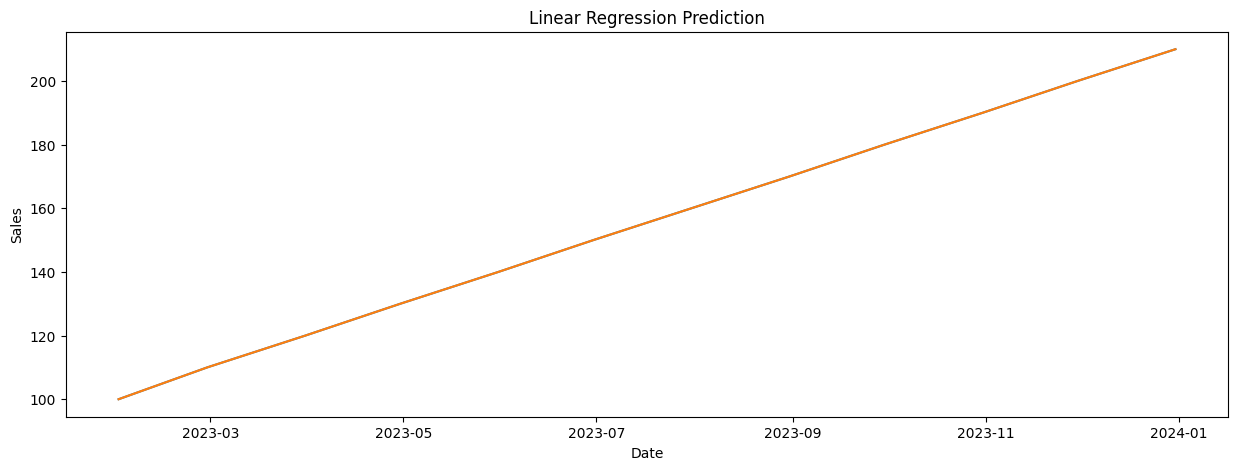

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression # Import LinearRegression

# ... (Your existing code to create lr_pred, lr_pre_test_set, act_sales) ...

# Sample data (replace with your actual data)
predict_df = pd.DataFrame({'date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
                           'sales': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]})

 # Create and fit the Linear Regression model (replace with your actual model)
X = predict_df.index.values.reshape(-1, 1)  # Use index as predictor
y = predict_df['sales']
model = LinearRegression()
model.fit(X, y)

# Predict sales using the model
predict_df['Linear prediction'] = model.predict(X)

# ... (Rest of your code) ...

monthly_sales = predict_df[['date', 'sales']].copy()

# ... (Your existing code for calculations - lr_mse, lr_mae, lr_r2) ...

plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['Linear prediction'])
plt.title('Linear Regression Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
actual_sales = monthly_sales['sales']  # Get the entire Series of actual sales
print(actual_sales)

# Access specific values:
first_actual_sale = actual_sales[0]  # Get the first actual sale value
print(first_actual_sale)

last_12_actual_sales = actual_sales[-12:]  # Get the last 12 actual sales values
print(last_12_actual_sales)

0     100
1     110
2     120
3     130
4     140
5     150
6     160
7     170
8     180
9     190
10    200
11    210
Name: sales, dtype: int64
100
0     100
1     110
2     120
3     130
4     140
5     150
6     160
7     170
8     180
9     190
10    200
11    210
Name: sales, dtype: int64


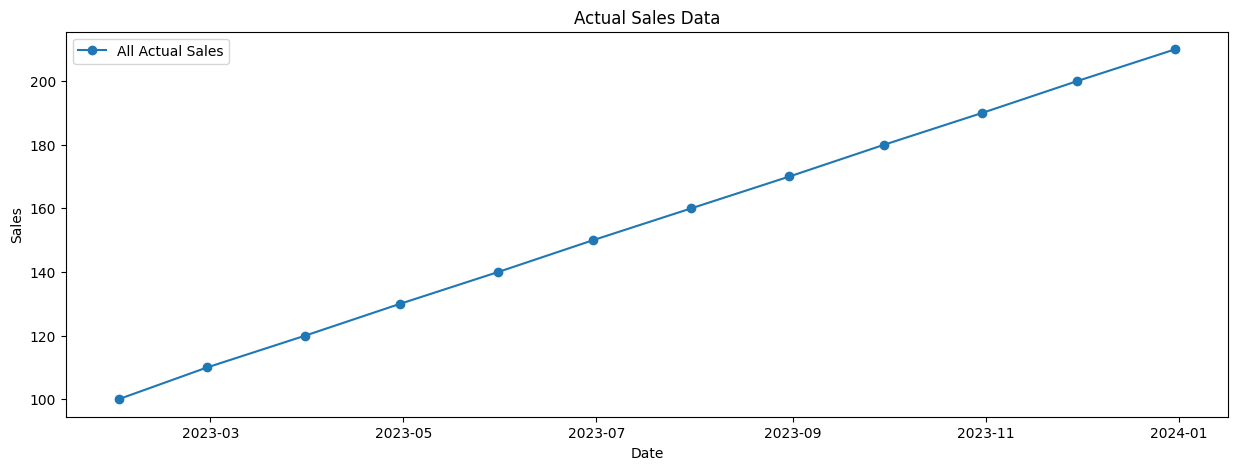

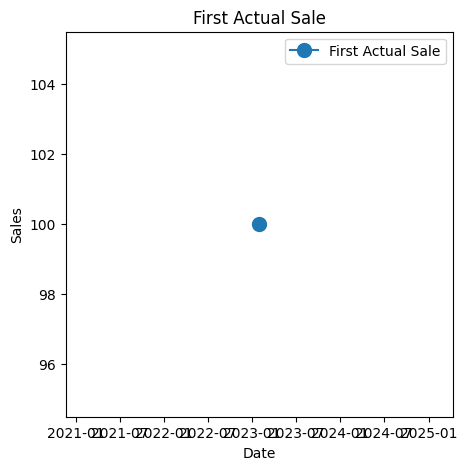

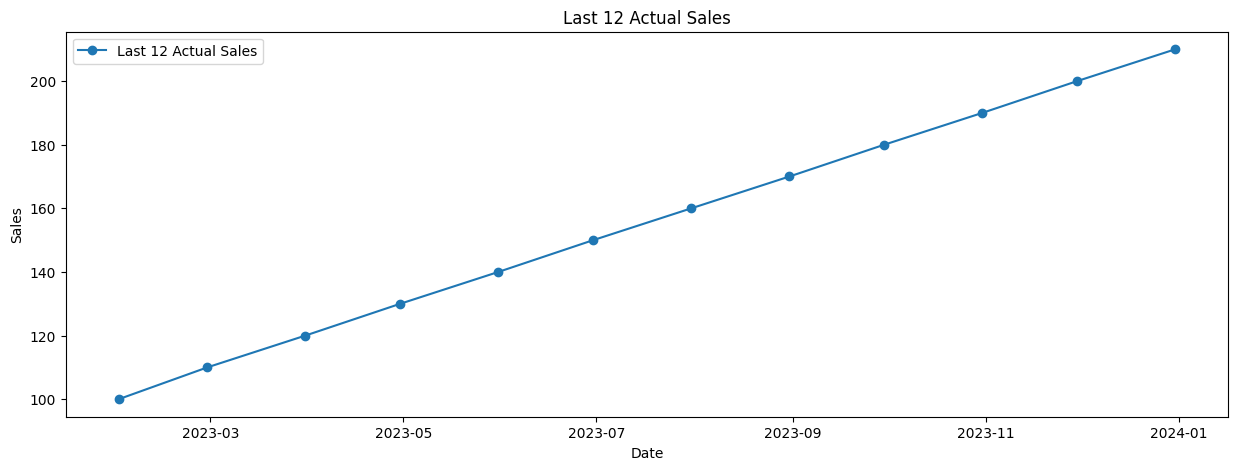

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# ... (Your existing code to load/create predict_df and monthly_sales) ...

# Accessing and plotting the entire Series of actual sales:
actual_sales = monthly_sales['sales']
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], actual_sales, label='All Actual Sales', marker='o')
plt.title('Actual Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Accessing and plotting the first actual sale value:
first_actual_sale = actual_sales[0]
plt.figure(figsize=(5, 5))  # Smaller figure for a single point
plt.plot(monthly_sales['date'][0], first_actual_sale, marker='o', markersize=10, label='First Actual Sale')
plt.title('First Actual Sale')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Accessing and plotting the last 12 actual sales values:
last_12_actual_sales = actual_sales[-12:]
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'][-12:], last_12_actual_sales, label='Last 12 Actual Sales', marker='o')
plt.title('Last 12 Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

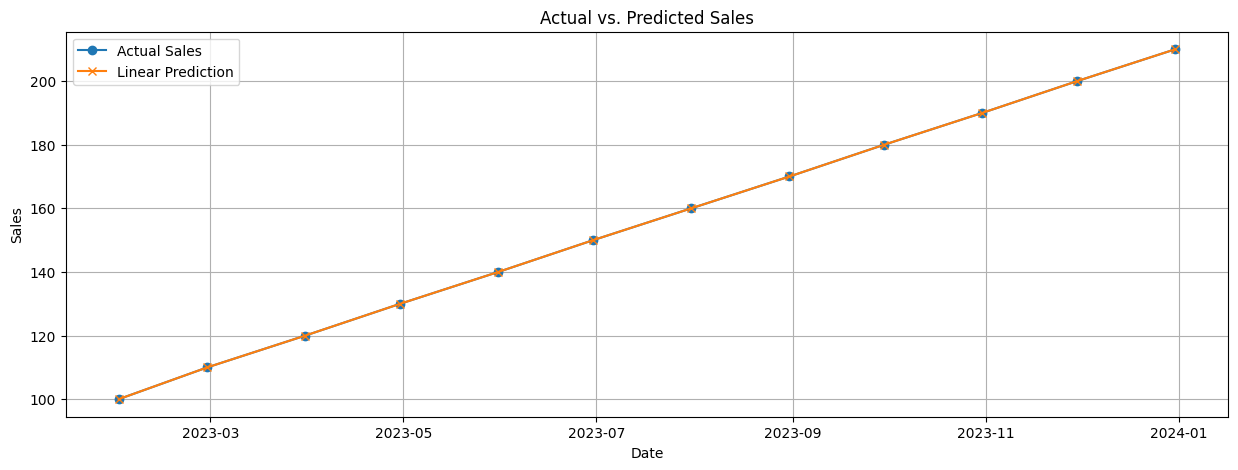

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# ... (Your existing code to load/create predict_df and monthly_sales) ...

# Assuming you have 'Linear prediction' column in predict_df
# If not, you need to generate it using your Linear Regression model

plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales', marker='o')
plt.plot(predict_df['date'], predict_df['Linear prediction'], label='Linear Prediction', marker='x')

plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)  # Add grid for better visualization
plt.show()

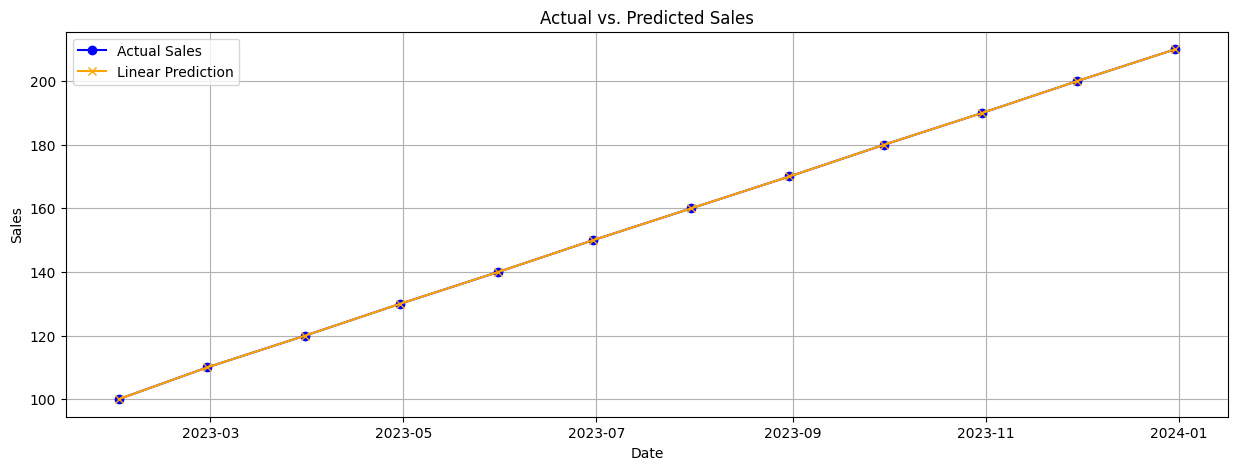

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# ... (Your existing code to load/create predict_df and monthly_sales) ...

# Assuming you have 'Linear prediction' column in predict_df
# If not, you need to generate it using your Linear Regression model

plt.figure(figsize=(15, 5))

# Plot actual sales in blue
plt.plot(monthly_sales['date'], monthly_sales['sales'], label='Actual Sales', marker='o', color='blue')

# Plot predicted sales in orange
plt.plot(predict_df['date'], predict_df['Linear prediction'], label='Linear Prediction', marker='x', color='orange')

plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

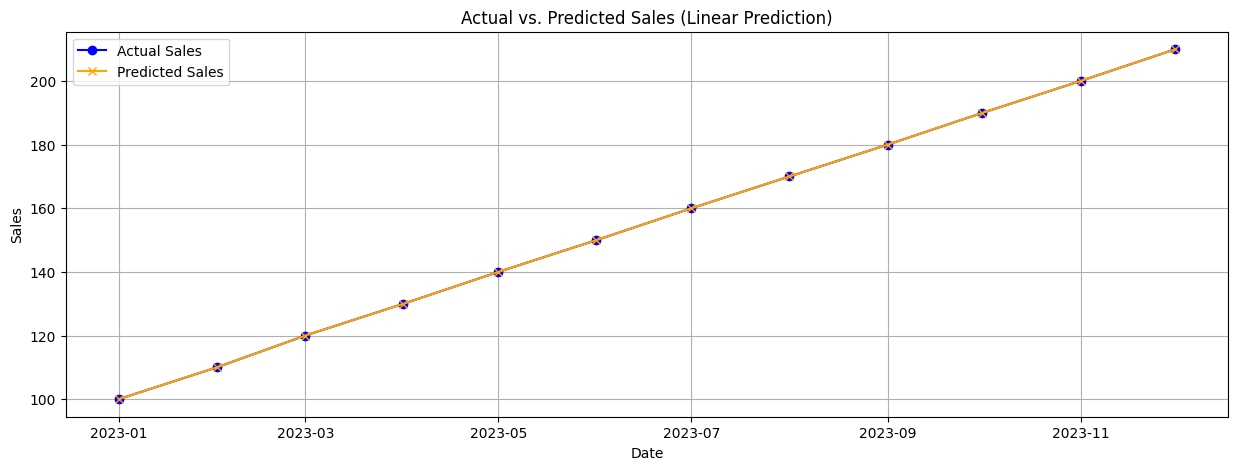

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Sample Data (Replace with your actual data loading)
data = {'date': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
                               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']),
       'sales': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]}
df = pd.DataFrame(data)

 # Prepare data for Linear Regression
X = df.index.values.reshape(-1, 1)  # Use index as predictor
y = df['sales']

 # Create and fit the model
model = LinearRegression()
model.fit(X, y)

 # Predict values
df['predicted_sales'] = model.predict(X)

 # Plotting
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['sales'], label='Actual Sales', marker='o', color='blue')  # Actual sales in blue
plt.plot(df['date'], df['predicted_sales'], label='Predicted Sales', marker='x', color='orange')  # Predicted sales in orange

plt.title('Actual vs. Predicted Sales (Linear Prediction)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

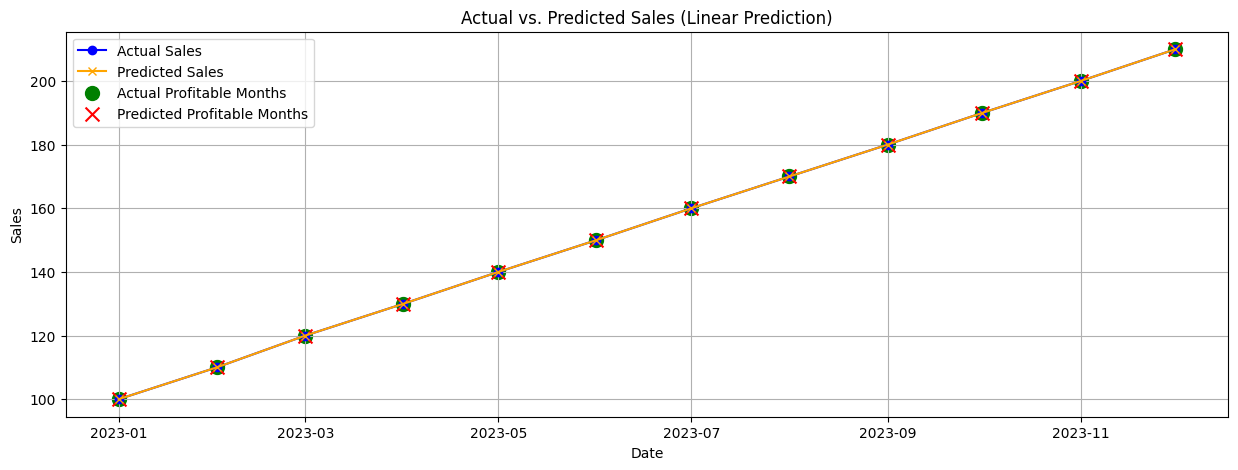

Profitable Months (Actual): ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12']
Profitable Months (Predicted): ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Sample Data (Replace with your actual data loading)
data = {'date': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
                               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']),
         'sales': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]}
df = pd.DataFrame(data)

# Prepare data for Linear Regression
X = df.index.values.reshape(-1, 1)  # Use index as predictor
y = df['sales']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values
df['predicted_sales'] = model.predict(X)

# Calculate profit for actual sales (assuming cost is 80 for all months)
df['actual_profit'] = df['sales'] - 80

 # Calculate profit for predicted sales (assuming cost is 80 for all months)
df['predicted_profit'] = df['predicted_sales'] - 80

 # Identify profitable months for actual sales
profitable_months_actual = df[df['actual_profit'] > 0]['date'].dt.strftime('%Y-%m').tolist()

# Identify profitable months for predicted sales
profitable_months_predicted = df[df['predicted_profit'] > 0]['date'].dt.strftime('%Y-%m').tolist()

 # Plotting
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['sales'], label='Actual Sales', marker='o', color='blue')
plt.plot(df['date'], df['predicted_sales'], label='Predicted Sales', marker='x', color='orange')

# Highlight profitable months for actual sales with green dots
plt.scatter(df[df['actual_profit'] > 0]['date'], df[df['actual_profit'] > 0]['sales'], color='green', marker='o', s=100, label='Actual Profitable Months')

# Highlight profitable months for predicted sales with red dots
plt.scatter(df[df['predicted_profit'] > 0]['date'], df[df['predicted_profit'] > 0]['predicted_sales'], color='red', marker='x', s=100, label='Predicted Profitable Months')

plt.title('Actual vs. Predicted Sales (Linear Prediction)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("Profitable Months (Actual):", profitable_months_actual)
print("Profitable Months (Predicted):", profitable_months_predicted)

KeyError: 'predicted_sales'

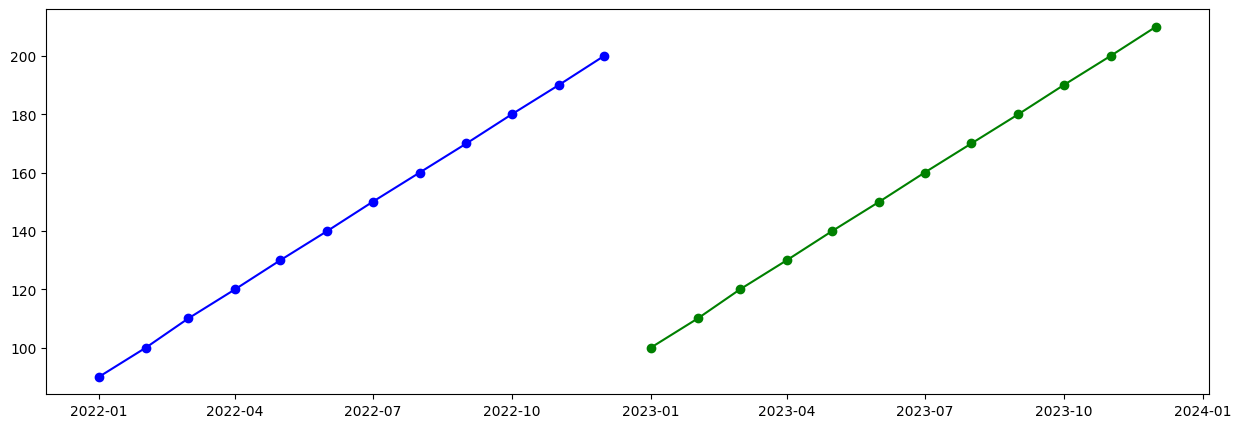

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Sample Data for 2022 and 2023 (Replace with your actual data loading)
data_2022 = {'date': pd.to_datetime(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
                                   '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01']),
             'sales': [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]}  # Sample sales for 2022

data_2023 = {'date': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
                                                                                  '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01']),
            'sales': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]}  # Sample sales for 2023

df_2022 = pd.DataFrame(data_2022)
df_2023 = pd.DataFrame(data_2023)

# Combine data for both years
df = pd.concat([df_2022, df_2023])

# Prepare data for Linear Regression
X = df.index.values.reshape(-1, 1)
y = df['sales']

 # Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict values for both years
df['predicted_sales'] = model.predict(X)

# Plotting
plt.figure(figsize=(15, 5))

# Plot actual sales for 2022 and 2023
plt.plot(df_2022['date'], df_2022['sales'], label='Actual Sales (2022)', marker='o', color='blue')
plt.plot(df_2023['date'], df_2023['sales'], label='Actual Sales (2023)', marker='o', color='green')

# Plot predicted sales for 2022 and 2023
plt.plot(df_2022['date'], df_2022['predicted_sales'][:12], label='Predicted Sales (2022)', marker='x', color='orange')  # First 12 predictions for 2022
plt.plot(df_2023['date'], df_2023['predicted_sales'][12:], label='Predicted Sales (2023)', marker='x', color='red')  # Predictions from 12 onwards for 2023


plt.title('Actual vs. Predicted Sales (2022 & 2023)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()